In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 超参数
COLS_ALL = ['期号', '开奖日期', '第1位结果', '第2位结果', '第3位结果', '跨度', '和值', '独胆']

# 读取excel文件并获取指定列
df = pd.read_csv('Data\排列3历史开奖.csv', usecols=COLS_ALL, encoding='GBK')
print(df)

#1#  读取数据列
coloumName = '独胆'
data = df[coloumName]


         期号        开奖日期  第1位结果  第2位结果  第3位结果  跨度  和值  独胆
0     24144    2024-6-2      1      4      7   6  12   3
1     24143    2024-6-1      1      8      5   7  14   4
2     24142   2024-5-31      4      2      6   4  12   3
3     24141   2024-5-30      8      0      4   8  12   1
4     24140   2024-5-29      5      2      0   5   7   9
...     ...         ...    ...    ...    ...  ..  ..  ..
6911   4005  2004-11-22      0      5      4   5   9   2
6912   4004  2004-11-21      4      4      3   1  11   0
6913   4003  2004-11-19      7      1      8   7  16   9
6914   4002  2004-11-16      3      1      7   6  11   7
6915   4001  2004-11-14      1      9      2   8  12   1

[6916 rows x 8 columns]


2024-06-03 19:30:28.533 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=11.367429)
2024-06-03 19:30:28.856 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewnorm distribution with error=11.367429)
2024-06-03 19:30:28.980 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=11.367428)
2024-06-03 19:30:29.061 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=12.269878)
2024-06-03 19:30:29.071 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=11.084623)
2024-06-03 19:30:29.237 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted t distribution with error=11.367429)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,11.084623,457.372963,484.739335,inf,0.095431,2.859490e-55
gamma,11.367428,482.613760,503.138538,inf,0.110838,1.863603e-74
t,11.367429,482.610310,503.135088,inf,0.110741,2.509860e-74
skewnorm,11.367429,482.610282,503.135060,inf,0.110741,2.508895e-74
norm,11.367429,480.610271,494.293456,inf,0.110742,2.506180e-74


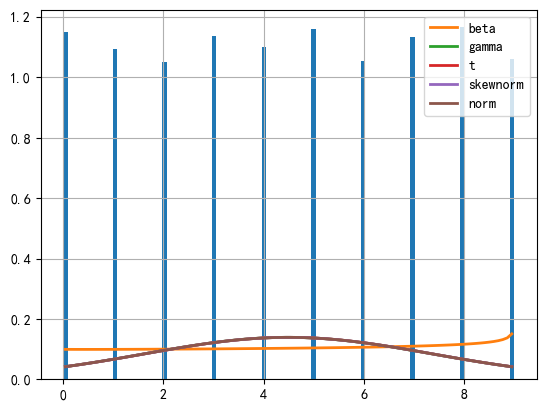

In [19]:
#2# 计算绘制参数

# 计算均值、标准差、中位数
mean = np.mean(data)
std = np.std(data)
median = np.median(data)

# 拟合多种分布
from fitter import Fitter
f = Fitter(data, distributions=['norm', 'skewnorm', 't', 'gamma', 'beta', 'lognorm'])
f.fit()
f.summary() #打印结果

最佳拟合分布名称: beta
最佳拟合分布参数: {'a': 0.991050162636282, 'b': 0.9162396461980427, 'loc': -0.45024722406120793, 'scale': 9.45024722406121}


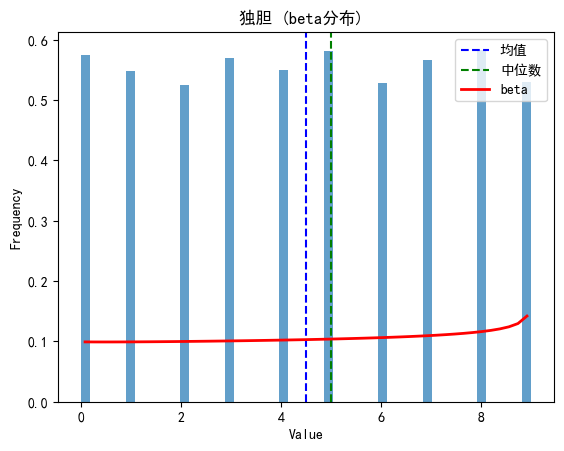

In [20]:
#3# 绘制直方图

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.axvline(mean, color='b', linestyle='--', label='均值') # 绘制均值线（红色线）
plt.axvline(median, color='g', linestyle='--', label='中位数') # 绘制中位数线（绿色线）
                                                                # 绘制众数线(不用画，看最高的直方柱即是)
plt.hist(data, bins=50, density=True, alpha=0.7) # 绘制直方图

# 获取最佳拟合分布的名称和参数
best_fit = f.get_best(method='sumsquare_error')
best_fit_name = list(best_fit.keys())[0]
best_fit_params = best_fit[best_fit_name]
# 打印调试信息
print("最佳拟合分布名称:", best_fit_name)
print("最佳拟合分布参数:", best_fit_params)
      
from scipy.stats import norm, skewnorm, t, gamma, beta, lognorm

# 创建映射从分布名称到实际的分布对象
distribution_map = {
    'norm': norm,
    'skewnorm': skewnorm,
    't': t,
    'gamma': gamma,
    'beta': beta,
    'lognorm': lognorm
}
# 计算直方图相关参数
hist, bins = np.histogram(data, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 计算拟合曲线的值
bin_centers = (bins[1:] + bins[:-1]) / 2
dist = distribution_map[best_fit_name]
pdf_values = dist.pdf(bin_centers, **best_fit_params)

plt.plot(bin_centers, pdf_values, 'r-', lw=2, label=best_fit_name) # 绘制拟合曲线
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(coloumName+' ('+best_fit_name+'分布) ')
plt.legend()
plt.show()